## Take home challenge 2: 
### Question1: Find all the  "adopted  users"   which are users  who   have logged  into  the  product  on  three  separate days  in  at  least  one  seven day  period.

In [3]:
#import packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read in csv file
df = pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
#take a look at how many rows
print(df.shape)
print(df.columns)

(207917, 3)
Index(['time_stamp', 'user_id', 'visited'], dtype='object')


In [6]:
#take a look at what type of datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
#check for missing values
df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [8]:
#convert timestamp to time series
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [9]:
#take a look at day of the week counts using pandas date time
print("Monday:", len(df[df.time_stamp.dt.dayofweek == 0]))
print("Tuesday:", len(df[df.time_stamp.dt.dayofweek == 1]))
print("Wednesday:", len(df[df.time_stamp.dt.dayofweek == 2]))
print("Thursday:", len(df[df.time_stamp.dt.dayofweek == 3]))
print("Friday:", len(df[df.time_stamp.dt.dayofweek == 4]))
print("Saturday:", len(df[df.time_stamp.dt.dayofweek == 5]))
print("Sunday:", len(df[df.time_stamp.dt.dayofweek == 6]))

Monday: 29711
Tuesday: 29784
Wednesday: 29742
Thursday: 29448
Friday: 29730
Saturday: 29728
Sunday: 29774


In [10]:
#take a look at earliest and latest time stamp in dataframe
print(df.time_stamp.min())
print(df.time_stamp.max())

2012-05-31 08:20:06
2014-06-06 14:58:50


In [11]:
#take a look at month time stamp counts in data frame
for i in range(1,13):
    print(i, len(df[df.time_stamp.dt.month == i]))

1 19947
2 19724
3 23770
4 25164
5 27563
6 10003
7 10096
8 11323
9 12317
10 14478
11 15496
12 18036


In [12]:
#take a look at hour of the day time stamp counts  in data frame
for i in range(0,24):
    print(len(df[df.time_stamp.dt.hour == i]))

8294
5685
9469
8085
8488
10293
6886
7387
9604
7234
8793
9397
9188
6168
9500
8252
7404
12052
8862
9002
10377
7356
11898
8243


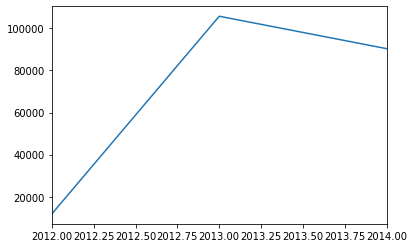

In [13]:
#plot the count of time stamps by the year 
%matplotlib inline
df.time_stamp.dt.year.value_counts().sort_index().plot()

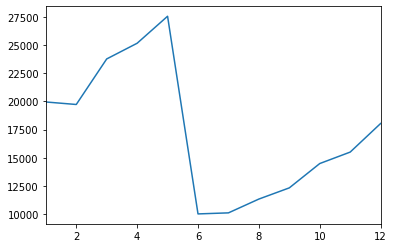

In [14]:
#plot the counts of time stamps by the month
df.time_stamp.dt.month.value_counts().sort_index().plot()

### The days of the week are pretty evenly distributed with the most logging into product on Tuesday and the least logging in on Thursday.  The time stamps span from May 31 2012 to June 6 2014 with the most logging in during 2013 which is due to the majority data being represented in 2013. In addition, the overall highest usage was in the months of April and May and lowest usage in the months of June and July which matches the plot above showing a sharp increase in use in May and then a decline of usage in June.  Furthermore,  the time of the day there was the most logging into product was 5 pm and 10 pm and the lowest logging into product was 1 am and 1 pm.    

In [15]:
#create numpy array of the two highest users(>600)
hi = df['user_id'].value_counts() >= 600
hi_user = hi[hi].index.values
hi_user

array([3623,  906], dtype=int64)

In [16]:
#there are two users(3623 and 906);take a look at their time stamps in the pandas dataframe
df_hi = df[df.user_id.isin(hi_user)]
print(df_hi.shape)
df_hi.head()

(1206, 3)


,time_stamp,user_id,visited
14796,2012-06-18 22:49:52,906,1
14797,2012-06-25 22:49:52,906,1
14798,2012-07-09 22:49:52,906,1
14799,2012-07-10 22:49:52,906,1
14800,2012-07-16 22:49:52,906,1


In [17]:
#take a look at the days of the week for the highest two users 
df_hi.time_stamp.dt.dayofweek.value_counts()

4    177
1    176
5    174
6    171
3    170
0    170
2    168
Name: time_stamp, dtype: int64

In [18]:
#take a look at the month counts for the two highest users 
df_hi.time_stamp.dt.month.value_counts()

3     119
12    115
1     113
5     111
10    110
4     109
2     108
11    107
9      87
8      86
7      77
6      64
Name: time_stamp, dtype: int64

In [19]:
#take a look at the hour of the day counts for the two highest users 
df_hi.time_stamp.dt.hour.value_counts()

14    606
22    600
Name: time_stamp, dtype: int64

### Conclusions about highest users time usage: Highest users were seen logging into product most on Tuesdays and Fridays and seen least on Mondays and Wednesdays.  Highest usage on Tuesdays matches the conclusions on all the users.  The highest month of logging into product was in December and March and the lowest month of logging in was in June and July. The lowest usage in June matches the overall users' lowest.  The times of the highest users was restricted to 2 pm and 10 pm.  The highest user was only logged into the product at 2 pm and the second highest user was only logged into the product at 10 pm. 10 pm also matched the highest time slot of all users.  

In [20]:
#sort values by user id and time stamp 
df.sort_values(by=['user_id', 'time_stamp'], inplace=True)
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [21]:
#take a look at the counts of 'visited' as column value and user_id as the index;take a look at max and min visited counts
counts = df.groupby(by=['user_id']).count()[['visited']]
print(counts.shape)
print(counts.visited.max())
print(counts.visited.min())

(8823, 1)
606
1


In [22]:
# combine the visited numbers counts with the user id data frame for one combined dataframe
user_id = df[['user_id']].copy()
user_id.set_index('user_id', inplace=True)
print(user_id.shape)
countz = user_id.join(counts, how='left').fillna(0)
print(countz.head())
print(countz.shape)

(207917, 0)
         visited
user_id         
1              1
2             14
2             14
2             14
2             14
(207917, 1)


In [23]:
#create column for adopted where less than 3 visits indicates not adopted and then get value counts
countz['adopted'] = 1
countz.loc[countz.visited < 3, 'adopted'] = 0
print(countz.head())
countz.adopted.value_counts()

         visited  adopted
user_id                  
1              1        0
2             14        1
2             14        1
2             14        1
2             14        1


1    201002
0      6915
Name: adopted, dtype: int64

### So this indicates out of the 207,917 entries in the dataframe, 201,002 are adopted and 6,915 are not.

### Question 2: Defining  "adopted   users"  as  that found in the previous question,  identify   which   factors  predict  or classify future  user  adoption.

In [24]:
#read in the dataframe for take home users 
df1 = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [25]:
#take a look at first couple rows of dataframe 
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [26]:
#take a look at shape of dataframe
df1.shape

(12000, 10)

In [27]:
#take a look at data types of the data frame columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [28]:
#take a look at mean of folks opting into mailing list 
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [29]:
#check for any missing values
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [30]:
#create a column utilizing pandas date time for last session creation
#df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])
convert_time = lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')
df1['last_session_creation_time'] = df1['last_session_creation_time'].map(convert_time, na_action='ignore')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [31]:
#create a column utilizing pandas date time for creation time
df1['creation_time'] = pd.to_datetime(df1['creation_time'])

In [32]:
#examine counts of the days of the week
print("Monday:", len(df1[df1.creation_time.dt.dayofweek == 0]))
print("Tuesday:", len(df1[df1.creation_time.dt.dayofweek == 1]))
print("Wednesday:", len(df1[df1.creation_time.dt.dayofweek == 2]))
print("Thursday:", len(df1[df1.creation_time.dt.dayofweek == 3]))
print("Friday:", len(df1[df1.creation_time.dt.dayofweek == 4]))
print("Saturday:", len(df1[df1.creation_time.dt.dayofweek == 5]))
print("Sunday:", len(df1[df1.creation_time.dt.dayofweek == 6]))

Monday: 1712
Tuesday: 1656
Wednesday: 1689
Thursday: 1803
Friday: 1822
Saturday: 1661
Sunday: 1657


In [33]:
#take a look at earliest creation time and latest creation time
print(df1.creation_time.min())
print(df1.creation_time.max())

2012-05-31 00:43:27
2014-05-30 23:59:19


### This shows the earliest creation time to be in May of 2012 and the latest creation time to be in May of 2014.  It also shows that the max creation times are on Fridays and the min creation times are on Tuesdays.  

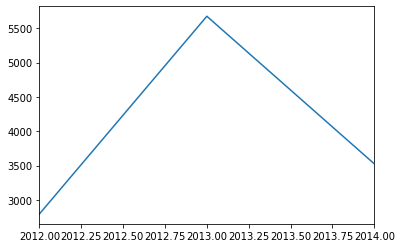

In [34]:
#take a look at the distribution of creation time by year
df1.creation_time.dt.year.value_counts().sort_index().plot()

### This shows that there is a peak right at the start of 2013

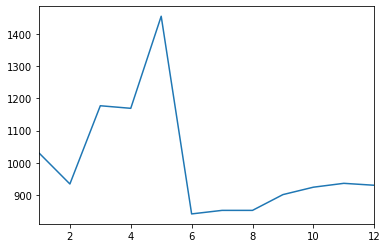

In [35]:
#take a look at the distribution of creation time by month
df1.creation_time.dt.month.value_counts().sort_index().plot()

### This shows there is a peak at month 5 or May and a dramtic dip in month 6 or June.

In [36]:
#for now, replace missing columns with zero in order to utilize a ml model on dataset 
df1.last_session_creation_time.fillna('0', inplace=True)
df1.invited_by_user_id.fillna('0', inplace=True)

In [37]:
#create a dataframe with object id and number of adopted users
countz.reset_index(inplace=True)
countz.drop(['visited'], axis=1, inplace=True)
countz.rename(columns={'user_id':'object_id'}, inplace=True)
print(countz.head())
countz.columns

   object_id  adopted
0          1        0
1          2        1
2          2        1
3          2        1
4          2        1


Index(['object_id', 'adopted'], dtype='object')

In [38]:
#take a look at the shape
print(countz.shape)

(12000, 10)
(207917, 2)


In [39]:
#merge adopted user dataframe with original dataframe
df_merge = pd.merge(df1, countz, on='object_id', how='outer')
print(df_merge.shape)
df_merge.head(10)

(211094, 11)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1.0


In [40]:
#take a look at info of merged dataframe
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211094 entries, 0 to 211093
Data columns (total 11 columns):
object_id                     211094 non-null int64
creation_time                 211094 non-null datetime64[ns]
name                          211094 non-null object
email                         211094 non-null object
creation_source               211094 non-null object
last_session_creation_time    211094 non-null object
opted_in_to_mailing_list      211094 non-null int64
enabled_for_marketing_drip    211094 non-null int64
org_id                        211094 non-null int64
invited_by_user_id            211094 non-null object
adopted                       207917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 19.3+ MB


In [41]:
#get the unique values of creation source and utilize map function to cconver to numeric
print(df_merge.creation_source.unique())
df_merge['creation_source'] = df_merge.creation_source.map({'GUEST_INVITE':1,'ORG_INVITE':2,'SIGNUP':3,'PERSONAL_PROJECTS':4,'SIGNUP_GOOGLE_AUTH':5})
df_merge.head()

['GUEST_INVITE' 'ORG_INVITE' 'SIGNUP' 'PERSONAL_PROJECTS'
 'SIGNUP_GOOGLE_AUTH']


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,2014-04-22 03:53:30,1,0,11,10803,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2,2014-03-31 03:45:04,0,0,1,316,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2,2014-03-31 03:45:04,0,0,1,316,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2,2014-03-31 03:45:04,0,0,1,316,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2,2014-03-31 03:45:04,0,0,1,316,1.0


In [42]:
#fill any missing values
df_merge.fillna(0, inplace=True)

In [43]:
#drop non-numeric columns
df_merge.drop(['name','email','invited_by_user_id'], axis=1, inplace=True)
df_merge.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted
0,1,2014-04-22 03:53:30,1,2014-04-22 03:53:30,1,0,11,0.0
1,2,2013-11-15 03:45:04,2,2014-03-31 03:45:04,0,0,1,1.0
2,2,2013-11-15 03:45:04,2,2014-03-31 03:45:04,0,0,1,1.0
3,2,2013-11-15 03:45:04,2,2014-03-31 03:45:04,0,0,1,1.0
4,2,2013-11-15 03:45:04,2,2014-03-31 03:45:04,0,0,1,1.0


In [44]:
#convert object datatype column to numeric representing the year
df_merge['last_session_creation_time'] = df_merge.last_session_creation_time.str.slice(0,4)
df_merge.last_session_creation_time.head()

0    2014
1    2014
2    2014
3    2014
4    2014
Name: last_session_creation_time, dtype: object

In [45]:
#utilize the map function to assign numeric values to the years 
df_merge['last_session_creation_time'] = df_merge.last_session_creation_time.map({'2012':1, '2013':2,'2014':3, '0':4})

In [46]:
#take a look at info for dataframe
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211094 entries, 0 to 211093
Data columns (total 8 columns):
object_id                     211094 non-null int64
creation_time                 211094 non-null datetime64[ns]
creation_source               211094 non-null int64
last_session_creation_time    211094 non-null int64
opted_in_to_mailing_list      211094 non-null int64
enabled_for_marketing_drip    211094 non-null int64
org_id                        211094 non-null int64
adopted                       211094 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 14.5 MB


In [47]:
#change creation_time to day of week by utilizing pandas datetime
df_merge['day'] = df_merge.creation_time.dt.dayofweek
df_merge.day.value_counts()

3    33937
5    32625
0    30535
2    29440
4    29364
1    27912
6    27281
Name: day, dtype: int64

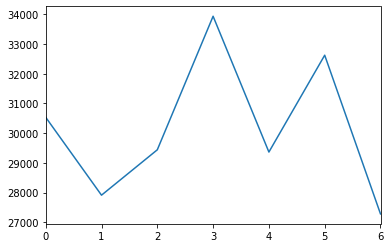

In [48]:
#look for trends in the day of the week
df_merge.day.value_counts().sort_index().plot()

### The majority of accounts were created on Thursday and Saturday.  

In [49]:
#create column for month also to look for any trends 
df_merge['month'] = df_merge.creation_time.dt.month
df_merge.month.value_counts()

6     28266
8     25652
7     23696
9     22487
10    20144
11    18590
2     14081
12    13331
1     13252
4     11498
3     11221
5      8876
Name: month, dtype: int64

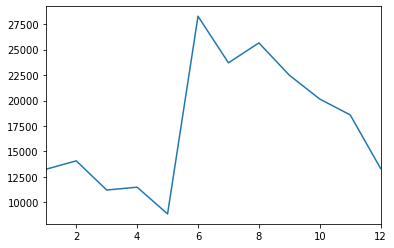

In [50]:
#plot month value counts to look for trends on months that more accounts were created
df_merge.month.value_counts().sort_index().plot()

### The majority of accounts were created in the summer between June and August.  

In [51]:
#utilize pandas date time feature to take a look at years 
df_merge['year'] = df_merge.creation_time.dt.year
df_merge.year.value_counts()

2012    112509
2013     89077
2014      9508
Name: year, dtype: int64

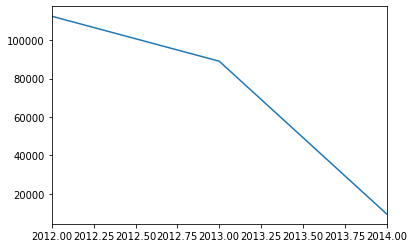

In [52]:
#look for trends as to which year the account was created 
df_merge.year.value_counts().sort_index().plot()

### The majority of accounts were created in 2012 and then have decreased since that time. 

In [53]:
#take a look at pandas data time feature for hour and view its value counts 
df_merge['hour'] = df_merge.creation_time.dt.hour
df_merge.hour.value_counts()

17    12182
22    12018
20    10504
5     10436
8      9734
14     9618
2      9605
11     9548
12     9341
19     9146
18     8986
10     8915
4      8632
0      8406
23     8387
15     8367
3      8218
7      7530
16     7525
21     7495
9      7373
6      7007
13     6314
1      5807
Name: hour, dtype: int64

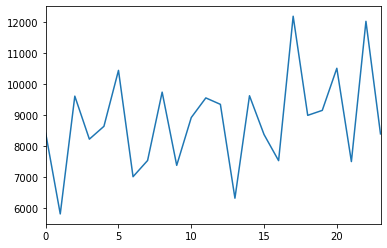

In [54]:
#plot the hours to see if there are any trends on the hours the accounts were created
df_merge.hour.value_counts().sort_index().plot()

### The plot above shows that the highest occurence for creation time of accounts were either in early morning, or in the latter part of the evening.  This could indicate that the account is being created outside of work hours. 

In [55]:
#import all packages for sklearn
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [56]:
#drop pandas date time feature, only keep numeric columns
df_merge.drop(['creation_time'], axis=1, inplace=True)
df_merge.head()

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,day,month,year,hour
0,1,1,3,1,0,11,0.0,1,4,2014,3
1,2,2,3,0,0,1,1.0,4,11,2013,3
2,2,2,3,0,0,1,1.0,4,11,2013,3
3,2,2,3,0,0,1,1.0,4,11,2013,3
4,2,2,3,0,0,1,1.0,4,11,2013,3


In [57]:
#create X features and y response numpy arrays in order to plug into ml model
x_cols = df_merge.drop('adopted',axis = 1)
X = x_cols.as_matrix()
y = df_merge['adopted'].values
print(X.shape)
print(y.shape)

(211094, 10)
(211094,)


In [59]:
#utilize Gaussian NB classifier and compare model prediction accuracy 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("Test_Accuracy:",metrics.accuracy_score(y_test, gnb_pred))

Test_Accuracy: 0.954191602583


In [60]:
#utilize subset selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# extract the best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_cols, y)
# summarize scores
print(fit.scores_)

[  1.02999146e+04   2.26722796e+01   2.09931277e+02   4.08573633e+00
   2.56134359e+00   4.40772999e+04   4.08437488e-02   8.86822812e+02
   1.72228159e+00   1.07661371e+02]


In [61]:
#take alook at all the features to compare to which has the strongest weight in chi squared feature selection method
x_cols.columns

Index(['object_id', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'day', 'month', 'year', 'hour'],
      dtype='object')

In [63]:
#test the accuracy with the new features
x1_cols = ['object_id', 'creation_source', 'last_session_creation_time','org_id',
        'month', 'hour']
X1 = df_merge[x1_cols].as_matrix()
gnb = GaussianNB()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.3,random_state=42)
gnb.fit(X1_train,y1_train)
gnb_pred = gnb.predict(X1_test)
print("gnb test accuracy with chi2 features selected:",metrics.accuracy_score(y1_test, gnb_pred))

gnb test accuracy with chi2 features selected: 0.954191602583


In [64]:
#perform confusion matrix to analyze FP/FN and test how well the algorithm classifies
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
gnb.fit(X1_train, y1_train)
gnb_pred = gnb.predict(X1_test)
conf_matrix_gnb = confusion_matrix(y1_test, gnb_pred)
print(conf_matrix_gnb)
print(classification_report(y1_test,gnb_pred))

[[ 2402   688]
 [ 2213 58026]]
              precision    recall  f1-score   support

         0.0       0.52      0.78      0.62      3090
         1.0       0.99      0.96      0.98     60239

    accuracy                           0.95     63329
   macro avg       0.75      0.87      0.80     63329
weighted avg       0.97      0.95      0.96     63329



In [89]:
#look at auc curve
gnb_prob = gnb.predict_proba(X1_test)[:,1]
metrics.roc_auc_score(y1_test, gnb_prob)

0.93432493899301117

### Utilizing the chi squared features on the Gaussian Naive Bayes model did not improve the test accuracy of 95%.  The precision, recall, and f1 score were 0.97, 0.95 and 0.96 respectively with AUC of 93%.

In [78]:
#compare test accuracy utilizing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dec_tre = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
#train decision tree classifier
dec_tre.fit(X_train,y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(147765, 10) (63329, 10) (147765,) (63329,)


In [79]:
#check test accuracy
from sklearn import metrics
y_pred = dec_tre.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.994189076095


In [80]:
#perform GridSearchCV to tune the hyperparameters on the decision tree model and check cross val score
from sklearn.model_selection import GridSearchCV
param_grid = {
    'random_state': [1,5,42],
    'max_depth': [1,10,100]}
dec_tre_cv = GridSearchCV(dec_tre,param_grid,cv=4)
dec_tre_cv.fit(X,y)
print(dec_tre_cv.best_params_)
scores = cross_val_score(dec_tre, X, y, cv=4)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

{'max_depth': 1, 'random_state': 1}
Average cross-validation score: 0.95


In [81]:
#check if the correct features were selected
sel = SelectFromModel(dec_tre, threshold = 0.005)
sel.fit(x_cols,y)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort=False,
                                                 random_state=None,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=0.005)

In [82]:
#print out the list of selected features from sklearn
sel.get_support(indices=True)
selected_feat=x_cols.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

10
Index(['object_id', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'day', 'month', 'year', 'hour'],
      dtype='object')


In [73]:
#perform confusion matrix on decision tree classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dec_tre.fit(X_train, y_train)
y_pred = dec_tre.predict(X_test)
conf_matrix_dec_tre = confusion_matrix(y_test, y_pred)
print(conf_matrix_dec_tre)
print(classification_report(y_test,y_pred))

[[ 2741   349]
 [   34 60205]]
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      3090
         1.0       0.99      1.00      1.00     60239

    accuracy                           0.99     63329
   macro avg       0.99      0.94      0.97     63329
weighted avg       0.99      0.99      0.99     63329



In [85]:
#look at auc curve
y_pred_prob = dec_tre.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.94521194727517699

### The decision tree was the best classifier at 99% accuracy and 99% precision, recall and f1 score.  Feature extraction methods were utilized but all features were chosen in the final algorithm.  AUC was 95%.  THus, this is a good model for predicting who will be an adopted user and who will not.